<a href="https://colab.research.google.com/github/vasudevan-gomathy/NLP_Customer_Segmentation/blob/main/E_commerce_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce Customer Segmentation

## **Importing packages and Loading the dataset**

In [ ]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings

In [ ]:
# Loading the dataset

df=pd.read_csv("/content/data-4.csv",encoding="ISO-8859-1")
df.shape

(541909, 8)

## **Glance of the dataset**

In [ ]:
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Getting Info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Converting the column into desirable data type

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#df['InvoiceNo']=df['InvoiceNo'].astype(int)
#df["CustomerID"]=df["CustomerID"].astype(int)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## **Handling missing value**

In [ ]:
# Checking for missing values

df.isnull().sum()  

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#dropping the missing values/rows from the CustomerID

df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)                              
df.shape

(406829, 8)

In [ ]:
df.isnull().sum()  

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## **Handling Duplicated Record**

In [ ]:
# Checking for duplicate value

df.duplicated().value_counts()

False    401604
True       5225
dtype: int64

In [ ]:
# Dropping duplicated records

df.drop_duplicates(inplace = True)
df.shape    

(401604, 8)

## **Doing NLP on Description column**

### Cleaning the text

In [ ]:
# Removing characters other than Alphabets

df["Desc_new"]=df["Description"].str.replace("[^a-zA-Z]","  ") 
df["Desc_new"]=df["Desc_new"].astype(str)

<ipython-input-23-38065d6c3e5d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Desc_new"]=df["Description"].str.replace("[^a-zA-Z]","  ")


In [ ]:
df["Desc_new"]=df["Desc_new"].apply(lambda row:" ".join([word for word in row.split() if len(word)>2]))
df["Desc_new"]

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Desc_new, Length: 401604, dtype: object

In [ ]:
# Lowering the text

df["Desc_new"]=[review.lower() for review in df["Desc_new"]]
df["Desc_new"]

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Desc_new, Length: 401604, dtype: object

### Removing stop words and Lemmitization

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stopwrds =stopwords.words('english')

#Making cutom list of stop words to be removed
addwrds=[]

#Adding to thelist of words
stopwrds.extend(addwrds)

#Function to remove stop words
def remove_stopwrds(rev):
  review_tokenized=word_tokenize(rev)
  rev_new=" ".join([i for i in review_tokenized if i not in stopwrds])
  return rev_new


#Removing Stop words
df['Desc_new']=[remove_stopwrds(r) for r in df['Desc_new']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Begin Lemmatisation
nltk.download("wordnet")
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

#function to convert nltk tag to wordnet tag
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startwith('J'):
    return wordnet.ADJ
  elif nltk_tag.startwith('V'):
    return wordnet.VERB
  elif nltk_tag.startwith('N'):
    return wordnet.NOUN
  elif nltk_tag.startwith('R'):
    return wordnet.ADJ
  else:
    return None


def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_-word_tokenize(sentence))
  wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)

  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
     lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)


  df["Desc_new"]=df['Desc_new'].apply(lambda x:lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#Removing duplicated descriptions

df2=df["Desc_new"].drop_duplicates()
df2=pd.DataFrame(df2)
df2

,Desc_new
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
503602,set ribbons perfectly pretty
504104,set ribbons party
530382,pink crystal skull phone charm
537621,cream hanging heart light holder


In [ ]:
#Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer # give you the bag of words model
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False) 

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df2["Desc_new"]) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df3=pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x=bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## **Clustering (K-means)**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("fivethirtyeight")

from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
list_k=list(range(1,25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

**To find the optimal value of K we are use Elbow plot ,where k is the hyperparameter.**

Text(0, 0.5, 'Sum of squared error')

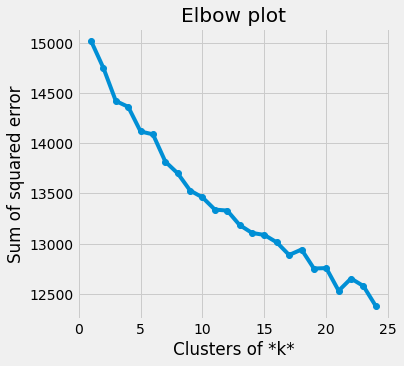

In [ ]:
# Make elbow plot

plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

**Here we used Kmeans to find the optimal vlaue of K Since there is no optimal value that can be infered here with the elbow plot we will do PCA.(Principal Component Analysis)**

In [ ]:
#performing standarisation

sc=StandardScaler()                                                                   
X_scaled= sc.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
components= None
pca=PCA(n_components = components)                                        #components is the number of reduced relevant columns (hyperparameter) 
pca.fit(x) 

PCA()

Text(0, 0.5, 'Explained variance(%)')

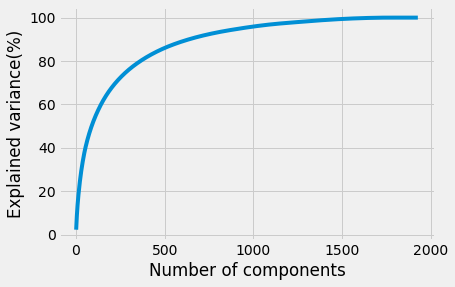

In [ ]:
#plot the cumulative varience

components=len(pca.explained_variance_ratio_)\
  if components  is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_*100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance(%)")

Number of components: 638


Text(0, 0.5, 'Explained variance (%)')

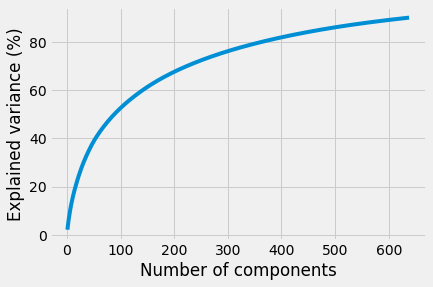

In [ ]:
#From the above graph we can see that it takes 1500 components to reach flat curve(100% varience).
# choosing around  90% of variations:

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)
pca.fit(x)

# optimum no:of components

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot

plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
     

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(638)
Principal_Component_Analysis=pca.fit_transform(x)
Principal_Component_Analysis.shape

(3763, 638)

In [ ]:
#Elbow plot
#We make a plot btwn K value and inertia

list_k=list(range(1,20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

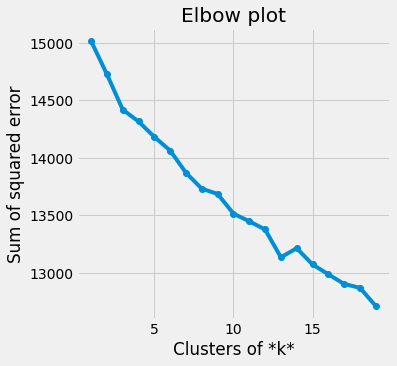

In [ ]:
# Make elbow plot

plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

In [ ]:
#km modelling

km=KMeans(n_clusters=12)         #applying k
km.fit(Principal_Component_Analysis )   #fit the data

centroids = km.cluster_centers_

In [ ]:
#shows which group each datapoint belongs to

km.labels_

array([2, 4, 4, ..., 4, 2, 4], dtype=int32)

In [ ]:
#Predicts the labels of cluster

label=km.fit_predict(Principal_Component_Analysis)
print(label)    

[8 3 4 ... 9 8 4]


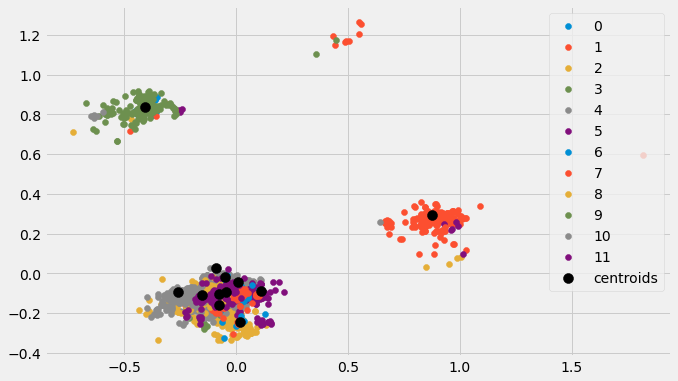

In [ ]:
#Getting the centroids
 
centroids=km.cluster_centers_
llabels=np.unique(label)

#plotting

plt.figure(figsize=(10,6))
for i in llabels:
  plt.scatter(Principal_Component_Analysis[label == i,0],Principal_Component_Analysis[label == i,1],label =i)
plt.scatter(centroids[:,0],centroids[:,1],s=100,c="k",label="centroids")
plt.legend()
plt.show()

In [ ]:
df5=pd.DataFrame(km.labels_)
print(df5.shape)
df5

(3763, 1)


,0
0,8
1,3
2,4
3,4
4,10
...,...
3758,1
3759,1
3760,9
3761,8


In [ ]:
df2=df2.reset_index(drop=True)
df2

,Desc_new
0,white hanging heart light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart
...,...
3758,set ribbons perfectly pretty
3759,set ribbons party
3760,pink crystal skull phone charm
3761,cream hanging heart light holder


In [ ]:
df6=df2.join(df5)
df6.rename(columns={0:'Product Code'},inplace=True)
df6.head(3)

,Desc_new,Product Code
0,white hanging heart light holder,8
1,white metal lantern,3
2,cream cupid hearts coat hanger,4


In [ ]:
df8=pd.merge(df,df6,how="left",on="Desc_new")
df8

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,10
...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,pack spaceboy napkins,4
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,children apron dolly girl,4
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery dolly girl,4
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,childrens cutlery circus parade,4


In [ ]:
df9 = pd.get_dummies(df8,columns=["Product Code"])     ##product code one hot encoding
df9.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code_0,...,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart light holder,0,...,0,0,0,0,0,0,1,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,0,...,0,1,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,0,...,0,0,1,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,0,...,0,0,1,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df10 = df9.copy()      #copying df9 

In [ ]:
df10 = df10.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Country","Desc_new"],axis=1)
df10.head()

,Quantity,UnitPrice,CustomerID,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
0,6,2.55,17850.0,0,0,0,0,0,0,0,0,1,0,0,0
1,6,3.39,17850.0,0,0,0,1,0,0,0,0,0,0,0,0
2,8,2.75,17850.0,0,0,0,0,1,0,0,0,0,0,0,0
3,6,3.39,17850.0,0,0,0,0,1,0,0,0,0,0,0,0
4,6,3.39,17850.0,0,0,0,0,0,0,0,0,0,0,1,0


**Grouping the Customers based on CustomerID:**

In [ ]:
df11 = df10.groupby(['CustomerID']).mean()
df11

,Quantity,UnitPrice,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
CustomerID,,,,,,,,,,,,,,
12346.0,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,13.505495,2.644011,0.000000,0.076923,0.109890,0.010989,0.489011,0.115385,0.032967,0.032967,0.005495,0.071429,0.038462,0.016484
12348.0,75.516129,5.764839,0.000000,0.096774,0.032258,0.000000,0.741935,0.064516,0.000000,0.000000,0.000000,0.064516,0.000000,0.000000
12349.0,8.643836,8.289041,0.041096,0.219178,0.136986,0.013699,0.383562,0.082192,0.000000,0.054795,0.013699,0.027397,0.027397,0.000000
12350.0,11.588235,3.841176,0.000000,0.000000,0.058824,0.176471,0.588235,0.058824,0.000000,0.058824,0.000000,0.058824,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,4.500000,4.765000,0.000000,0.100000,0.100000,0.000000,0.700000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18281.0,7.714286,5.622857,0.000000,0.285714,0.000000,0.000000,0.571429,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000
18282.0,7.538462,4.821538,0.000000,0.076923,0.000000,0.000000,0.769231,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000


In [ ]:
# Converting into numpy array:

y = df11.to_numpy()
y

array([[0.00000000e+00, 1.04000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.35054945e+01, 2.64401099e+00, 0.00000000e+00, ...,
        7.14285714e-02, 3.84615385e-02, 1.64835165e-02],
       [7.55161290e+01, 5.76483871e+00, 0.00000000e+00, ...,
        6.45161290e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.53846154e+00, 4.82153846e+00, 0.00000000e+00, ...,
        7.69230769e-02, 0.00000000e+00, 0.00000000e+00],
       [1.88210818e+00, 1.62875173e+00, 1.52565881e-02, ...,
        1.10957004e-02, 9.70873786e-03, 1.66435506e-02],
       [2.26571429e+01, 1.49357143e+00, 1.42857143e-02, ...,
        7.14285714e-02, 1.42857143e-02, 7.14285714e-02]])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
y_scaled = sc.fit_transform(y)

In [ ]:
list_k=list(range(1,15))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(y_scaled)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

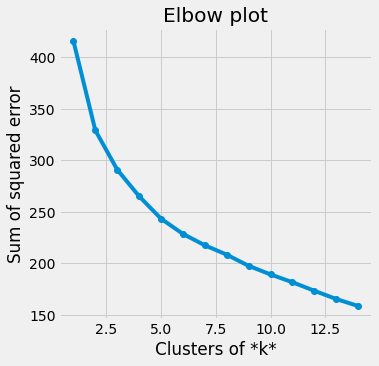

In [ ]:
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

**From Elbow plot we can say that the optimal K value is at 4,thus the customers can be clusterd into 4 clusters based on their similarities**

In [ ]:
km = KMeans(n_clusters=4)     # applying k = 4
km.fit(y_scaled)          # fit the data 

centroids = km.cluster_centers_   # final centroid points

# print("centroids: ",centroids)
print("inertia: ",km.inertia_) 

inertia:  265.1127987944185


In [ ]:
km.labels_ 

array([2, 1, 2, ..., 2, 3, 1], dtype=int32)

In [ ]:
label = km.fit_predict(y_scaled)  
print(label)

[1 3 1 ... 1 2 3]


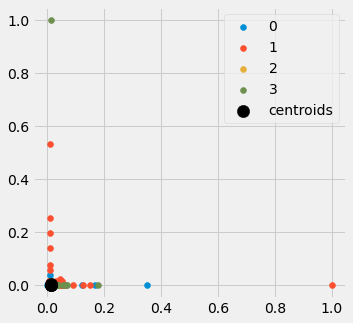

In [ ]:
# Getting the Centroids and Cluster labels
centroids = km.cluster_centers_
labels = np.unique(label)

#  plotting
plt.figure(figsize=(5, 5)) 
for i in labels:
    plt.scatter(y_scaled[label == i , 0] , y_scaled[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] ,  c="k", s=150, label="centroids")
plt.legend()
plt.show()

Since the graph doesnt give a clear picture of the clusters formed ,we are converting the label to dataframe and assigne the respective labels to their clusters and plot them.

In [ ]:
df13 = pd.DataFrame(label)
df13.head()

,0
0,1
1,3
2,1
3,0
4,3


In [ ]:
df13.reset_index(level=0, inplace=True)                  #reseting  the index
df13.head()

,index,0
0,0,1
1,1,3
2,2,1
3,3,0
4,4,3


In [ ]:
df13.rename(columns={'index':'ID', 0:'Customer cluster'},inplace=True)
df13.head()

,ID,Customer cluster
0,0,1
1,1,3
2,2,1
3,3,0
4,4,3


In [ ]:
df14 = df13.groupby("Customer cluster").count()           #grouping the df based n the custmoer cluster and counting  customers belonging to each cluster
df14

,ID
Customer cluster,
0,1080
1,669
2,200
3,2423


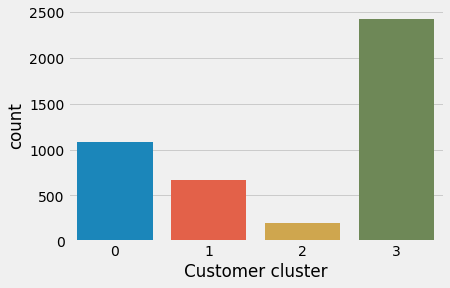

In [ ]:
import seaborn as sns
sns.countplot(df13["Customer cluster"])

**From the above graph Customer Cluster 2 is having the maximum number of Customers and cluster 0 has the minimum number of customers**